In [33]:
import os
import numpy as np  
import pandas as pd 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [34]:
train_path = os.path.join(os.getcwd(), 'train.csv')
feature_path = os.path.join(os.getcwd(), 'feamat.csv')
test_path = os.path.join(os.getcwd(), 'test.csv')

In [35]:
train_data = pd.read_csv(train_path)
feature_data = pd.read_csv(feature_path)
test_data = pd.read_csv(test_path)

In [36]:
traget_data = train_data["Expected"]

In [37]:
train_data[['chemical_id','assay_id']] = train_data.Id.str.split(";",expand=True) 
test_data[['chemical_id','assay_id']] = test_data.x.str.split(";",expand=True) 

In [38]:
feature_data.replace([np.inf, -np.inf], np.nan, inplace =True)
feature_data['V15'].fillna(value=feature_data['V15'].mean(), inplace = True)

In [39]:
feature_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1066,V1067,V1068,V1069,V1070,V1071,V1072,V1073,V1074,V1075
0,60-35-5,178,59.037114,-0.808,43.09,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,103-90-2,1983,151.063329,0.870,49.33,0.0,0.0,0.0,0.083333,0.142259,...,0,0,0,0,0,0,0,0,0,0
2,968-81-0,1989,324.114378,2.960,100.72,0.0,0.0,0.0,0.185395,0.161948,...,0,0,0,0,0,0,0,0,0,0
3,520-45-6,122903,168.042259,-0.551,60.44,0.0,0.0,0.0,0.055556,0.198742,...,0,0,0,0,0,0,0,0,0,0
4,50594-66-6,44073,360.996485,4.557,89.67,0.0,0.0,0.0,0.136083,0.276855,...,0,0,0,0,0,0,0,0,0,0


In [40]:
def get_feature_matrix():
    """
    get feature matrix data
    :return: feature matrix
    """
    data = pd.read_csv(train_path)
    label_data = data["Expected"].values
    Id_list = data['Id'].values
    feature_matrix = []
    for id in Id_list:
        chemical_id, assay_id = id.split(';')
        matched_data = feature_data.loc[feature_data['V1'] == chemical_id].values[0]
        matched_data[1] = int(assay_id)
        feature_matrix.append(matched_data)
    return np.array(label_data), np.array(feature_matrix)

In [41]:
label_data, raw_feature_matrix = get_feature_matrix()
min_max_scaler = preprocessing.MinMaxScaler()
feature_matrix = min_max_scaler.fit_transform(raw_feature_matrix[:, 2:])
feature_matrix

array([[0.17122401, 0.59273088, 0.05200648, ..., 0.        , 0.        ,
        0.        ],
       [0.0755261 , 0.57114521, 0.02194144, ..., 0.        , 0.        ,
        0.        ],
       [0.19838607, 0.74791436, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08201345, 0.52047722, 0.08923109, ..., 0.        , 0.        ,
        0.        ],
       [0.05874252, 0.55084301, 0.02194144, ..., 0.        , 0.        ,
        0.        ],
       [0.36312399, 0.74027186, 0.1268156 , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
X = np.array(feature_matrix, dtype=float)
Y= label_data

In [53]:
def best_features(X, Y, maximum_feature_num=1000):
    bestfeatures = SelectKBest(score_func=chi2, k=1000)
    model = bestfeatures.fit(np.abs(X),Y)
    dfscores = pd.Series(model.scores_)
    dfscores.nlargest(maximum_feature_num).plot(kind='bar')
    plt.show()
    feature_columns = dfscores.nlargest(maximum_feature_num)
    feature_columns.index
    X_features = X[:, feature_columns.index]
    return feature_columns.index

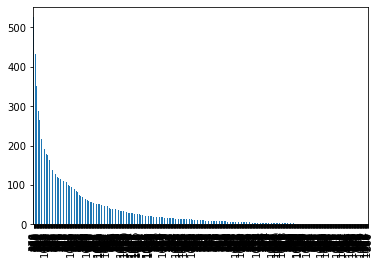

Int64Index([ 378,  969,  889,  888,  906,  204,  384,  449,  782,  385,
            ...
            1001,  683,  408,  592,   18,  556,  277, 1058,  789,  560],
           dtype='int64', length=882)


In [54]:
top_feature_columns = best_features(X, Y)
print(top_feature_columns)

In [13]:
np.sort(top_feature_columns)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   28,   30,   31,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
         47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
         58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,
         69,   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,
         80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
        113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,
        146,  147,  148,  149,  150,  151,  152,  1

In [15]:
remove_columns = ['V26', 'V27', 'V29', 'V196', 'V197', 'V199', 'V200', 'V224', 'V234', 'V241', 'V247', 'V255', 'V256',
                  'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V269', 'V274', 'V275',
                  'V276', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V288', 'V289', 'V290',
                  'V291', 'V292', 'V293', 'V295', 'V296', 'V298', 'V299', 'V301', 'V302', 'V303', 'V305', 'V306', 'V311', 
                  'V312', 'V313', 'V315', 'V318', 'V319', 'V320', 'V325', 'V326', 'V327', 'V330', 'V331', 'V332', 'V333', 
                  'V334', 'V353', 'V357', 'V358', 'V359', 'V360', 'V361', 'V362', 'V364', 'V365', 'V366', 'V367', 'V368', 
                  'V369', 'V389', 'V390', 'V395', 'V396', 'V397', 'V400', 'V402', 'V403', 'V404', 'V413', 'V414', 'V415', 
                  'V420', 'V423', 'V424', 'V425', 'V426', 'V427', 'V428', 'V429', 'V430', 'V431', 'V432', 'V435', 'V436', 
                  'V438', 'V439', 'V441', 'V442', 'V444', 'V445', 'V446', 'V454', 'V455', 'V456', 'V457', 'V458', 'V459',
                  'V460', 'V461', 'V462', 'V463', 'V464', 'V465', 'V467', 'V470', 'V471', 'V472', 'V473', 'V474', 'V480', 
                  'V481', 'V482', 'V488', 'V494', 'V502', 'V503', 'V507', 'V508', 'V509', 'V510', 'V511', 'V512', 'V513',
                  'V514', 'V515', 'V516', 'V517', 'V518', 'V594', 'V616', 'V618', 'V655', 'V916', 'V919', 'V922', 'V924', 
                  'V940', 'V958', 'V961', 'V979', 'V982', 'V985', 'V987', 'V1003', 'V1021', 'V1024', 'V1036', 'V1037', 
                  'V1038', 'V1039', 'V1041', 'V1042', 'V1043', 'V1044', 'V1045', 'V1046', 'V1047', 'V1048', 'V1050', 
                  'V1051', 'V1054', 'V1057', 'V1062', 'V1063', 'V1065', 'V1066', 'V1067', 'V1068', 'V1069']
for column in remove_columns:
     feature_data = feature_data.drop(column, axis = 1)
for column in ['V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
               'V21','V22','V23','V24','V25','V28','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41',
               'V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56','V57','V58','V59',
               'V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74','V75','V76','V77',
               'V78','V79','V80','V81','V82','V83','V84','V85','V86','V87','V88','V89','V90','V91','V92','V93','V94','V95',
               'V96','V97','V98','V99','V100','V101','V102','V103','V104','V105','V106','V107','V108','V109','V110','V111',
               'V112','V113','V114','V115','V116','V117','V118','V119','V120','V121','V122','V123','V124','V125','V126',
               'V127','V128','V129','V130','V131','V132','V133','V134','V135','V136','V137','V138','V139','V140','V141',
               'V142','V143','V144','V145','V146','V147','V148','V149','V150','V151','V152','V153','V154','V155','V156',
               'V157','V158','V159','V160','V161','V162','V163','V164','V165','V166','V167','V168','V169','V170','V171',
               'V172','V173','V174','V175','V176','V177','V178','V179','V180','V181','V182','V183','V184','V185','V186',
               'V187','V188','V189','V190','V191','V192','V193','V194','V195','V198','V201','V202','V203','V204','V205',
               'V206','V207','V208','V209','V210','V211','V212','V213','V214','V215','V216','V217','V218','V219','V220',
               'V221','V222','V223','V225','V226','V227','V228','V229','V230','V231','V232','V233','V235','V236','V237',
               'V238','V239','V240','V242','V243','V244','V245','V246','V248','V249','V250','V251','V252','V253','V254',
               'V257','V268','V270','V271','V272','V273','V277','V287','V294','V297','V300','V304','V307','V308','V309',
               'V310','V314','V316','V317','V321','V322','V323','V324','V328','V329','V335','V336','V337','V338','V339',
               'V340','V341','V342','V343','V344','V345','V346','V347','V348','V349','V350','V351','V352','V354','V355',
               'V356','V363','V370','V371','V372','V373','V374','V375','V376','V377','V378','V379','V380','V381','V382',
               'V383','V384','V385','V386','V387','V388','V391','V392','V393','V394','V398','V399','V401','V405','V406',
               'V407','V408','V409','V410','V411','V412','V416','V417','V418','V419','V421','V422','V433','V434','V437',
               'V440','V443','V447','V448','V449','V450','V451','V452','V453','V466','V468','V469','V475','V476','V477',
               'V478','V479','V483','V484','V485','V486','V487','V489','V490','V491','V492','V493','V495','V496','V497',
               'V498','V499','V500','V501','V504','V505','V506','V519','V520','V521','V522','V523','V524','V525','V526',
               'V527','V528','V529','V530','V531','V532','V533','V534','V535','V536','V537','V538','V539','V540','V541',
               'V542','V543','V544','V545','V546','V547','V548','V549','V550','V551','V552','V553','V554','V555','V556',
               'V557','V558','V559','V560','V561','V562','V563','V564','V565','V566','V567','V568','V569','V570','V571',
               'V572','V573','V574','V575','V576','V577','V578','V579','V580','V581','V582','V583','V584','V585','V586',
               'V587','V588','V589','V590','V591','V592','V593','V595','V596','V597','V598','V599','V600','V601','V602',
               'V603','V604','V605','V606','V607','V608','V609','V610','V611','V612','V613','V614','V615','V617','V619',
               'V620','V621','V622','V623','V624','V625','V626','V627','V628','V629','V630','V631','V632','V633','V634',
               'V635','V636','V637','V638','V639','V640','V641','V642','V643','V644','V645','V646','V647','V648','V649',
               'V650','V651','V652','V653','V654','V656','V657','V658','V659','V660','V661','V662','V663','V664','V665',
               'V666','V667','V668','V669','V670','V671','V672','V673','V674','V675','V676','V677','V678','V679','V680',
               'V681','V682','V683','V684','V685','V686','V687','V688','V689','V690','V691','V692','V693','V694','V695',
               'V696','V697','V698','V699','V700','V701','V702','V703','V704','V705','V706','V707','V708','V709','V710',
               'V711','V712','V713','V714','V715','V716','V717','V718','V719','V720','V721','V722','V723','V724','V725',
               'V726','V727','V728','V729','V730','V731','V732','V733','V734','V735','V736','V737','V738','V739','V740',
               'V741','V742','V743','V744','V745','V746','V747','V748','V749','V750','V751','V752','V753','V754','V755',
               'V756','V757','V758','V759','V760','V761','V762','V763','V764','V765','V766','V767','V768','V769','V770',
               'V771','V772','V773','V774','V775','V776','V777','V778','V779','V780','V781','V782','V783','V784','V785',
               'V786','V787','V788','V789','V790','V791','V792','V793','V794','V795','V796','V797','V798','V799','V800',
               'V801','V802','V803','V804','V805','V806','V807','V808','V809','V810','V811','V812','V813','V814','V815',
               'V816','V817','V818','V819','V820','V821','V822','V823','V824','V825','V826','V827','V828','V829','V830',
               'V831','V832','V833','V834','V835','V836','V837','V838','V839','V840','V841','V842','V843','V844','V845',
               'V846','V847','V848','V849','V850','V851','V852','V853','V854','V855','V856','V857','V858','V859','V860',
               'V861','V862','V863','V864','V865','V866','V867','V868','V869','V870','V871','V872','V873','V874','V875',
               'V876','V877','V878','V879','V880','V881','V882','V883','V884','V885','V886','V887','V888','V889','V890',
               'V891','V892','V893','V894','V895','V896','V897','V898','V899','V900','V901','V902','V903','V904','V905',
               'V906','V907','V908','V909','V910','V911','V912','V913','V914','V915','V917','V918','V920','V921','V923',
               'V925','V926','V927','V928','V929','V930','V931','V932','V933','V934','V935','V936','V937','V938','V939',
               'V941','V942','V943','V944','V945','V946','V947','V948','V949','V950','V951','V952','V953','V954','V955',
               'V956','V957','V959','V960','V962','V963','V964','V965','V966','V967','V968','V969','V970','V971','V972',
               'V973','V974','V975','V976','V977','V978','V980','V981','V983','V984','V986','V988','V989','V990','V991',
               'V992','V993','V994','V995','V996','V997','V998','V999','V1000','V1001','V1002','V1004','V1005','V1006',
               'V1007','V1008','V1009','V1010','V1011','V1012','V1013','V1014','V1015','V1016','V1017','V1018','V1019',
               'V1020','V1022','V1023','V1025','V1026','V1027','V1028','V1029','V1030','V1031','V1032','V1033','V1034',
               'V1035','V1040','V1049','V1052','V1053','V1055','V1056','V1058','V1059','V1060','V1061','V1064','V1070']:
     feature_data[column].replace(to_replace=0, value = feature_data[column].median(), inplace = True)

In [16]:
feature_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1059,V1060,V1061,V1064,V1070,V1071,V1072,V1073,V1074,V1075
0,60-35-5,178,59.037114,-0.808,43.09,0.0,0.0,0.0,0.102062,0.184195,...,0,0,0,0,0,0,0,0,0,0
1,103-90-2,1983,151.063329,0.870,49.33,0.0,0.0,0.0,0.083333,0.142259,...,0,0,0,0,0,0,0,0,0,0
2,968-81-0,1989,324.114378,2.960,100.72,0.0,0.0,0.0,0.185395,0.161948,...,0,0,0,0,0,0,0,0,0,0
3,520-45-6,122903,168.042259,-0.551,60.44,0.0,0.0,0.0,0.055556,0.198742,...,0,0,0,0,0,0,0,0,0,0
4,50594-66-6,44073,360.996485,4.557,89.67,0.0,0.0,0.0,0.136083,0.276855,...,0,0,0,0,0,0,0,0,0,0


In [17]:
feature_data.rename(columns = {'V1':'chemical_id'}, inplace = True) 
train_data = train_data.merge(feature_data, on="chemical_id", how="left")
train_data.drop(['chemical_id', 'Id','V2', 'Expected'], axis = 1, inplace = True)
test_data = test_data.merge(feature_data, on="chemical_id", how="left")

In [18]:
id_list = test_data.x
test_data = test_data.drop(['chemical_id','x', 'V2'], axis = 1, inplace = False)
print(test_data.head())
print(test_data.columns)

  assay_id          V3     V4      V5   V6   V7        V8        V9       V10  \
0     1682  164.120115  3.659   20.23  0.0  0.0  0.000000  0.068041  0.170103   
1     1656  431.056940  1.258  183.30  0.0  0.0  0.000000  0.151375  0.227671   
2       36  695.250845  6.365   95.92  0.0  0.0  0.174792  0.789110  1.360933   
3     1850  200.949810 -1.340   68.82  0.0  0.0  0.000000  0.058926  0.235702   
4       30  418.271924  4.775   72.83  0.0  0.0  0.000000  0.179152  0.516591   

   V11  ...  V1059  V1060  V1061  V1064  V1070  V1071  V1072  V1073  V1074  \
0  0.0  ...      0      0      0      0      0      0      0      0      0   
1  0.0  ...      0      0      0      0      0      0      0      0      0   
2  0.0  ...      0      0      0      0      0      0      0      0      0   
3  0.0  ...      0      0      0      0      0      0      0      0      0   
4  0.0  ...      0      0      0      0      0      0      0      0      0   

   V1075  
0      0  
1      0  
2      0  


In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
train_data = min_max_scaler.fit_transform(train_data)
test_data = min_max_scaler.fit_transform(test_data)

In [20]:
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
xgb_acc_score = []
xgb = XGBClassifier(n_estimators=200, max_depth=6)
X = train_data
y = traget_data
for train_index , test_index in kf.split(X, y):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    xgb.fit(X_train,y_train)
    xgb_pred_values = xgb.predict(X_test)
    xgb_acc = accuracy_score(xgb_pred_values , y_test)
    xgb_acc_score.append(xgb_acc)

C:\Users\Ruthvikjaini\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [21]:
avg_acc_score = sum(xgb_acc_score)/10
print('Avg accuracy of XGBClassifier : {}'.format(avg_acc_score))
f1 = f1_score(xgb_pred_values , y_test, average = 'macro')
print('f1_score of xgb(SKfold) : {}'.format(f1))

Avg accuracy of XGBClassifier : 0.9085812272022566
f1_score of xgb(SKfold) : 0.7831059001343305


In [22]:
prediction = xgb.predict(test_data)
df_submission = pd.DataFrame({'Id':  id_list, 'Predicted': prediction})
df_submission.to_csv('xgb_Submission(SKfold_-1000col).csv', index=False)